### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of points (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use a cloud GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "IHA1.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1 and HA2):

In [2]:
NAME1 = "Anthon Odengard"
NAME2 = ""
GROUP = ""

### Check Python version

In [3]:
from platform import python_version_tuple

assert (
    python_version_tuple()[:2] == ("3", "11")
), "You are not running Python 3.11. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os

nb_dirname = os.path.abspath("")
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in [
    "IHA1",
    "IHA2",
    "HA1",
    "HA2",
], "[ERROR] The notebook appears to have been moved from its original directory"

### Verify correct nb_fname

In [5]:
from IPython.display import HTML, display

try:
    display(
        HTML(
            r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(
                nb_fname=nb_fname
            )
        )
    )
except NameError:
    assert False, "Make sure to fill in the nb_fname variable above!"

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys

sys.path.append("..")
from ha_utils import check_notebook_uptodate_and_not_corrupted

check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/dml-cth/deep-machine-learning/master/home-assignments/IHA1/IHA1.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA1 - Assignment

Welcome to the first individual home assignment!  

This assignment consists of two parts:
 * Python and NumPy exercises;
 * Build a deep neural network for forward propagation.
  
The focus of this assignment is for you to gain practical knowledge with implementing forward and backward propagation of deep neural networks **without** using any deep learning framework. You will also gain practical knowledge in two of Python's scientific libraries, [NumPy](https://numpy.org/doc/1.26/) and [Matplotlib](https://matplotlib.org/devdocs/index.html). Note that NumPy and [PyTorch](https://pytorch.org/) (the deep learning framework used in this course) share a lot of similarities with how they handle arrays/tensors, so in the coming assignments, you can leverage on what you learn here.

Skeleton code is provided for most tasks, and every part you are expected to implement is marked with **YOUR CODE HERE**. Throughout the assignment, you will also need to submit written answers to some questions. These questions are mainly to make you reflect on some particular topics, and your answers will not be graded in detail.

We expect you to search and learn by yourself any commands you think are useful for these tasks. Don't limit yourself to what was taught in CL1. Use the help function, [stackoverflow](https://stackoverflow.com/), Google, the [Python documentation](https://docs.python.org/3.11/library/index.html) and the [NumPy](https://numpy.org/doc/2.0/index.html) documentation to your advantage.

**IMPORTANT NOTE**: The tests available are not exhaustive, meaning that if you pass a test you have avoided the most common mistakes, but it is still not guaranteed that your solution is 100% correct. To pass this assignment, we expect you to pass all tests. 

While we use the tests for grading here, we encourage you to implement unit tests like these yourself when developing any code. Sanity-checking that your code behaves as expected can save you a lot of time down the road.

Let's start by importing the necessary libraries below.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import utils.tests.iha1_tests as iha1_tests
from sklearn.datasets import fetch_openml

## 1. Lists and arrays introduction
First, we will warm up with a Python exercise and few NumPy exercises.

### 1.1 List comprehensions
Examine the code snippet provided below.

In [6]:
def square_even_numbers(max_num=24):
    my_list = []
    for i in range(max_num + 1):
        if i % 2 == 0:
            my_list.append(i**2)
    return my_list


print(square_even_numbers(24))

[0, 4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576]


This is not a very "[pythonic](http://docs.python-guide.org/en/latest/writing/style/)" way of writing. Lets re-write the code above using a [list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions). The result will be less code, more readable and elegant. Your solution should be able to fit into one line of code.

In [7]:
def square_even_numbers(max_num=24):
    my_list = [x**2 for x in range(max_num +1 ) if x%2==0]
    return my_list


print(square_even_numbers())

[0, 4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576]


In [8]:
assert square_even_numbers(1) == [0]
assert square_even_numbers(24) == [
    0,
    4,
    16,
    36,
    64,
    100,
    144,
    196,
    256,
    324,
    400,
    484,
    576,
]
assert len(square_even_numbers(-1)) == 0
assert len(square_even_numbers(100)) == 51
assert sorted(square_even_numbers(123)) == square_even_numbers(123)

### 1.2 Arrays, vectors, matrices, and tensors
Many operations in deep learning revolve around handling and modifying data structures such as vectors (1D), matrices (2D), and tensors (N-D). In NumPy, all of these can be represented using arrays (in PyTorch, we'll use torch.Tensor's instead). Thus, it is important for you to understand these structures and the effects of applying different operations (matrix multiplications, reshaping, etc.).

Run the cell below to create a numpy array.   

In [9]:
my_arr = np.array([1, 9, 25, 49])
print(my_arr)
print(my_arr.shape)
print(my_arr.ndim)

[ 1  9 25 49]
(4,)
1


The above result indicates that **my_arr** is an array of 4 elements with shape (4,) and one dimension. You might be temped to think of this as a vector, but the behavior of this array and a vector in the linear algebra sense can be very different. It is important to separate the two types because it will save a lot of debugging time later on. Read more about numpy shapes [here](https://stackoverflow.com/a/22074424).

Run the code below to see how the transpose operation behaves differently between an array and vector.

In [10]:
# print the shape of an array and the shape of a transposed array
print("my_arr is an array of shape:")
print(my_arr.shape)
print("The transpose of my_arr has the shape:")
print(my_arr.T.shape)

# print the shape of a column vector and the transpose of a column vector
my_col_vec = my_arr.reshape(4, 1)
print("my_col_vec is a vector of shape:")
print(my_col_vec.shape)
print("The transpose of my_col_vec has the shape:")
print(my_col_vec.T.shape)

my_arr is an array of shape:
(4,)
The transpose of my_arr has the shape:
(4,)
my_col_vec is a vector of shape:
(4, 1)
The transpose of my_col_vec has the shape:
(1, 4)


As an effect, matrix multiplication between arrays of different shape can give very different results.

In [11]:
print("The matrix multiplication between my_arr and my_arr has shape:")
print((my_arr @ my_arr).shape)

print("The matrix multiplication between my_arr and my_col_vec has shape:")
print((my_arr @ my_col_vec).shape)

print("The matrix multiplication between my_col_vec.T and my_col_vec has shape:")
print((my_col_vec.T @ my_col_vec).shape)

print("The matrix multiplication between my_col_vec and my_col_vec.T has shape:")
print((my_col_vec @ my_col_vec.T).shape)

print("The matrix multiplication between my_col_vec and my_col_vec raises an error:")
try:
    print(my_col_vec @ my_col_vec)
except ValueError as e:
    print(e)

print("The matrix multiplication between my_col_vec and my_arr raises an error:")
try:
    print(my_col_vec @ my_arr)
except ValueError as e:
    print(e)

The matrix multiplication between my_arr and my_arr has shape:
()
The matrix multiplication between my_arr and my_col_vec has shape:
(1,)
The matrix multiplication between my_col_vec.T and my_col_vec has shape:
(1, 1)
The matrix multiplication between my_col_vec and my_col_vec.T has shape:
(4, 4)
The matrix multiplication between my_col_vec and my_col_vec raises an error:
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)
The matrix multiplication between my_col_vec and my_arr raises an error:
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)


This, then has implications for multiplications with a matrix. One dimensional arrays can be both left-, and right multiplied with matrices.

In [12]:
my_matrix = np.random.rand(4, 4).round(2)  # We round for readability
print("my_matrix is a matrix with the following values and shape:")
print(my_matrix)
print(my_matrix.shape)

arr_times_matrix = my_arr @ my_matrix
matrix_times_arr = my_matrix @ my_arr
print("The matrix multiplication between my_matrix and my_arr has shape:")
print((arr_times_matrix).shape)

print("The matrix multiplication between my_arr and my_matrix has shape:")
print((matrix_times_arr).shape)

print("But their results are not the same:")
print(f"arr_times_matrix: {arr_times_matrix}")
print(f"matrix_times_arr: {matrix_times_arr}")

my_matrix is a matrix with the following values and shape:
[[0.58 0.86 0.53 0.23]
 [0.8  0.41 0.89 0.46]
 [0.84 0.39 0.95 0.96]
 [0.43 0.03 0.84 0.13]]
(4, 4)
The matrix multiplication between my_matrix and my_arr has shape:
(4,)
The matrix multiplication between my_arr and my_matrix has shape:
(4,)
But their results are not the same:
arr_times_matrix: [49.85 15.77 73.45 34.74]
matrix_times_arr: [32.84 49.28 75.14 28.07]


Wheras the reshaped version behaves like a column vector as expected.

In [13]:
matrix_times_col_vec = my_matrix @ my_col_vec
print(
    f"The matrix multiplication between my_matrix {my_matrix.shape} and my_col_vec {my_col_vec.shape} has shape:"
)
print((matrix_times_col_vec).shape)
print(
    f"Matrix times column vector gives the same values as the matrix times the array:"
)
print((matrix_times_col_vec.flatten() == matrix_times_arr).all())

row_vec_times_matrix = my_col_vec.T @ my_matrix
print(
    f"The matrix multiplication between my_col_vec.T {my_col_vec.T.shape} and my_matrix {my_matrix.shape} has shape:"
)
print((row_vec_times_matrix).shape)
print(f"Row vector times matrix gives the same values as the array times the matrix:")
print((row_vec_times_matrix.flatten() == arr_times_matrix).all())

The matrix multiplication between my_matrix (4, 4) and my_col_vec (4, 1) has shape:
(4, 1)
Matrix times column vector gives the same values as the matrix times the array:
True
The matrix multiplication between my_col_vec.T (1, 4) and my_matrix (4, 4) has shape:
(1, 4)
Row vector times matrix gives the same values as the array times the matrix:
True


To check your understanding, implement the following function which caluclates the resulting shape when multiplying two arrays of shape `(a, b)` and `(c, d)`. If the operation is not possible, return `None`.

In [14]:
def out_shape(shape1, shape2):
    """
    Calculate the shape of the resulting matrix when multiplying two arrays.

    Arguments:
    shape1 -- a tuple of 2 positive integers representing the shape of the first array
    shape2 -- a tuple of 2 positive integers representing the shape of the second array

    Returns:
    A tuple of integers representing the shape of the resulting matrix
    Returns None if the shapes are not compatible for matrix multiplication
    """
    if shape1[1] == shape2[0]:
        return (shape1[0], shape2[1])
    else:
        return None

In [15]:
assert isinstance(out_shape((1, 4), (4, 1)), tuple)
assert out_shape((1, 4), (4, 1)) == (1, 1)
assert out_shape((1, 1), (1, 1)) == (1, 1)
assert out_shape((4, 1), (4, 1)) == None


As a side-note, there are multiple different types of multiplication in NumPy such as [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) (@), [multiply](https://numpy.org/doc/stable/reference/generated/numpy.multiply.html) (*), and [dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html). Make sure to use the right one for each task.

### 1.3 Numpy exercises
Now run the cell below to create the numpy array `numbers` and then complete the exercises sequentially.

In [16]:
numbers = np.arange(24)
print(numbers)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [17]:
# TODO: reshape numbers into a 6x4 matrix
# YOUR CODE HERE
numbers = numbers.reshape(6,4)
print(numbers)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [18]:
# sample output from cell above for reference
#  [[ 0  1  2  3]
#   [ 4  5  6  7]
#   [ 8  9 10 11]
#   [12 13 14 15]
#   [16 17 18 19]
#   [20 21 22 23]]

In [19]:
# test case
iha1_tests.test_numpy_reshape(numbers)

Test passed


In [20]:
# TODO: set the element of the last row of the last column to zero
# Hint: Try what happends when indices are negative
# YOUR CODE HERE
numbers[-1,-1] = 0
print(numbers)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22  0]]


In [21]:
# sample output from cell above for reference
#  [[ 0  1  2  3]
#   [ 4  5  6  7]
#   [ 8  9 10 11]
#   [12 13 14 15]
#   [16 17 18 19]
#   [20 21 22  0]]

In [22]:
# test case
iha1_tests.test_numpy_neg_ix(numbers)

Test passed


In [23]:
# TODO: set every element of the first row to 0
# YOUR CODE HERE
numbers[0, :] = 0
print(numbers)

[[ 0  0  0  0]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22  0]]


In [24]:
# sample output from cell above for reference
#  [[ 0  0  0  0]
#   [ 4  5  6  7]
#   [ 8  9 10 11]
#   [12 13 14 15]
#   [16 17 18 19]
#   [20 21 22  0]]

In [25]:
# test case
iha1_tests.test_numpy_row_ix(numbers)

Test passed


In [26]:
# TODO: append a 1x4 row vector of zeros to `numbers`,
# resulting in a 7x4 matrix where the new row of zeros is the last row
# Hint: A new matrix must be created in the procedure. Numpy arrays are not dynamic.
# YOUR CODE HERE

new_array = np.array([0, 0, 0, 0])
numbers = np.vstack((numbers, new_array))
print(numbers)
print(numbers.shape)

[[ 0  0  0  0]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22  0]
 [ 0  0  0  0]]
(7, 4)


In [27]:
# sample output from cell above for reference
#   [[ 0  0  0  0]
#    [ 4  5  6  7]
#    [ 8  9 10 11]
#    [12 13 14 15]
#    [16 17 18 19]
#    [20 21 22  0]
#    [ 0  0  0  0]]
#  (7, 4)

In [28]:
# test case
iha1_tests.test_numpy_append_row(numbers)

Test passed


In [29]:
# TODO: set all elements with a value greater than 10 to the value 1
# YOUR CODE HERE
numbers[numbers > 10] = 1
print(numbers)

[[ 0  0  0  0]
 [ 4  5  6  7]
 [ 8  9 10  1]
 [ 1  1  1  1]
 [ 1  1  1  1]
 [ 1  1  1  0]
 [ 0  0  0  0]]


In [30]:
# sample output from cell above for reference
#  [[ 0  0  0  0]
#   [ 4  5  6  7]
#   [ 8  9 10  1]
#   [ 1  1  1  1]
#   [ 1  1  1  1]
#   [ 1  1  1  0]
#   [ 0  0  0  0]]

In [31]:
# test case
iha1_tests.test_numpy_bool_matrix(numbers)

Test passed


In [32]:
# TODO: compute the sum of every row and replace `numbers` with the answer
# YOUR CODE HERE
numbers = numbers.sum(axis=1)
print(numbers.shape)
print(numbers)

(7,)
[ 0 22 28  4  4  3  0]


In [33]:
# sample output from cell above for reference
#   (7,)
#   [ 0 22 28  4  4  3  0]

In [34]:
# test case
iha1_tests.test_numpy_sum(numbers)

Test passed


## 2 Building your first neural network
It is time to start implementing your first neural network. In this lab youw will focus on the fundamentals of forward and backpropagation. As the main goal is for you to proper learn the fundamentals and get a solid understanding, the neural networks in this lab are kept very simple. In upcoming labs you will build more advanced networks, but the principles learned in this lab still holds true for more complex problems and network architectures.

### 2.1 Your first simple function (forward propagation)

To start things off, we will begin with a simple scalar and linear function
\begin{equation}
    y = w * x + b
\end{equation}
where $x$ is some scalar input. As you might recall, this is very similar to the function represented by a single neuron in a network. Here we have left out the activation function for now, and only focus on the scalar case for simplicity.

Start by implementing this function in the cell below. We call it forward as it's comparable to doing forward propagation for a single neuron (without any activation function).

In [35]:
def forward(x, w, b):
    """Implement the forward pass of a linear neuron.

    Arguments:
    x - a scalar input of type 'float'
    w - a scalar weight of type 'float'
    b - a scalar bias of type 'float'

    Returns:
    y - the output of the neuron, a scalar of type 'float'
    """
    y = None
    # YOUR CODE HERE
    y = x * w + b
    return y

We can visualize the function for some chosen input interval, and some choice of the weight $w$ and the bias $b$.

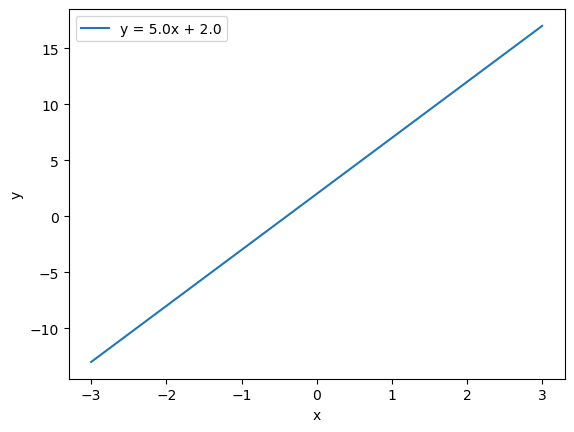

In [36]:
xs = np.linspace(-3, 3, 1000)
w = 5.0
b = 2.0
ys = []
for x_ in xs:
    ys.append(forward(x_, w, b))
plt.plot(xs, ys, label=f"y = {w}x + {b}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Let's also add a data point $(x, y) = (1.5, 14.0)$ and visualize that in the same plot as our line.

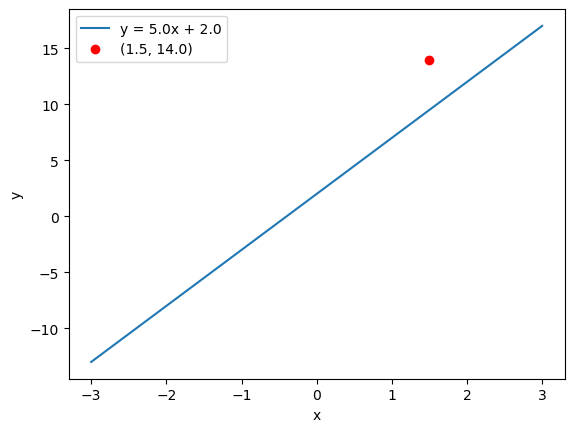

In [37]:
data = np.array([1.5, 14.0])  # x, y
w = 5.0
b = 2.0
xs = np.linspace(-3, 3, 1000)
ys = []
for x_ in xs:
    ys.append(forward(x_, w, b))
plt.plot(xs, ys, label=f"y = {w}x + {b}")
plt.plot(data[0], data[1], "ro", label=f"({data[0]}, {data[1]})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

As you can see in the plot, our line doesn't quite go through the data point.

Manually find some parameters for $w$ and $b$ such that your line fits the data point. 

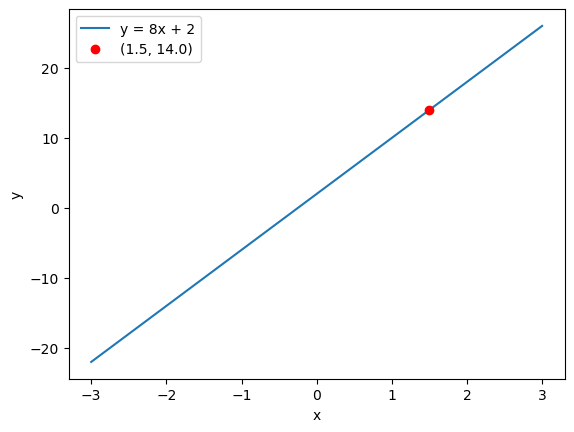

In [38]:
w = 8
b = 2
data = np.array([1.5, 14.0])  # x, y
xs = np.linspace(-3, 3, 1000)
ys = []
for x_ in xs:
    ys.append(forward(x_, w, b))
plt.plot(xs, ys, label=f"y = {w}x + {b}")
plt.plot(data[0], data[1], "ro", label=f"({data[0]}, {data[1]})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [39]:
assert forward(data[0], w, b) == data[1]

### 2.2 Using the derivative of the error

We can also do something a bit more general and use the derivative of the error between our line and the point to find better parameters for our function.
First, we will need to define some function that describes the error between our line and the point.
Implement an error function that returns the squared error between some prediction from our function, $y_{pred}$, and some true value $y_{true}$.

In [40]:
def error_function(y_pred, y_true):
    """Implement the error function as the squared error between the true and predicted value.

    Arguments:
    y_pred - a scalar value, the predicted value
    y_true - a scalar value, the true value

    Returns:
    error - a scalar value, the squared error between the true and predicted value
    """
    error = None
    error = (y_true - y_pred)**2
    return error

In [41]:
assert (
    np.abs(error_function(np.array(13.37), np.array(0.0)) - 178.75689999999997) < 0.01
)

Next, we need to know how the error changes when our function changes. In other words, we need to know the derivative of the error function with respect to our function, $\frac{\partial e}{\partial y}$.

Implement $\frac{\partial e}{\partial y}$ in the cell below.

In [42]:
def de_dy(y_pred, y_true):
    """Implement the derivative of the error function with respect to the predicted value.

    Arguments:
    y_pred - a scalar value, the predicted value
    y_true - a scalar value, the true value

    Returns:
    derivative - a scalar value, the derivative of the error with respect to the predicted value
    """
    derivative = None
    # YOUR CODE HERE
    derivative = -2 * (y_true - y_pred)
    return derivative

In [43]:
# Test the derivative function for our original parameters w = 5.0, b = 2.0
w, b = 5.0, 2.0
data = np.array([1.5, 14.0])  # x, y
x, y_true = data
y_pred = forward(x, w, b)
print("The error for the original parameters: ", error_function(y_pred, y_true))
print("The derivative of the error with respect to y: ", de_dy(y_pred, y_true))

The error for the original parameters:  20.25
The derivative of the error with respect to y:  -9.0


In [44]:
assert error_function(y_pred, y_true) == 20.25
assert de_dy(y_pred, y_true) == -9.0

What can you tell from this derivative? How can it guide you in moving your line? In particular, what does the sign of the derivative tell you? 

**Your answer:**
The sign of the derivative indicates how the error changes with respect to the models parameters. If the derivative is positive, the error increases, so we should move in the opposite direction (decrease the parameter). If the derivative is negative, the error decreases so we should continue in the same direction (increase the parameter).

What we are really interested in is how the error changes with respect to the parameters w and b. In the end, those are the parameters that we can change to reduce the error.

We already know how the error changes with the output of our function from the exercise above. If we also manage to find out how our output changes with respect to our parameters $w$ and $b$, then we should in some magical way be able to finally compute how the error changes with respect to our parameters.

In the cell below, implement the derivative of our function with respect to the parameters $w$ and $b$.

In [45]:
def dy_dw(x):
    """Implement the derivative of the function with respect to the parameter w.

    Arguments:
    x - a scalar value, the input to the function

    Returns:
    derivative - a scalar value, the derivative of the function with respect to w
    """
    derivative = None
    derivative = x
    return derivative


def dy_db():
    """Implement the derivative of the function with respect to the parameter b.

    Arguments:
    x - a scalar value, the input to the function

    Returns:
    derivative - a scalar value, the derivative of the function with respect to b
    """
    derivative = None
    derivative = 0
    return derivative

Why doesn't the derivative of the function with respect to $b$ include $x$ as an input? 

**Your answer:** 

The derivative of the function with respect to b doesnt include x because b is a scalar and does not depend on x. Therefore, changes in x do not affect b .

Now that we know how the error changes with respect to the function, and how the function changes with respect to it's parameters, we should be able to somehow combine these results to compute how the error changes with respect to the parameters of our function.

Implement the derivative of the error function with respect to the parameters $w$ and $b$ by using the results from the exercises above.

HINT: The [chain rule](https://en.wikipedia.org/wiki/Chain_rule) from your old calculus class is your friend here.

In [46]:
def de_dw(x, y_pred, y_true):
    """Implement the derivative of the error function with respect to the parameter w.

    Arguments:
    x - a scalar value, the input to the function
    y_pred - a scalar value, the predicted value
    y_true - a scalar value, the true value

    Returns:
    derivative - a scalar value, the derivative of the function with respect to b
    """
    derivative = None
    derivative = de_dy(y_pred, y_true) * dy_dw(x)
    return derivative


def de_db(y_pred, y_true):
    """Implement the derivative of the error function with respect to the parameter b.

    Arguments:
    y_pred - a scalar value, the predicted value
    y_true - a scalar value, the true value

    Returns:
    derivative - a scalar value, the derivative of the function with respect to b
    """
    derivative = None
    derivative = de_dy(y_pred, y_true)
    return derivative

In [47]:
print("The error for the original parameters: ", error_function(y_pred, y_true))
print("The derivative of the error with respect to w: ", de_dw(x, y_pred, y_true))
print("The derivative of the error with respect to b: ", de_db(y_pred, y_true))

The error for the original parameters:  20.25
The derivative of the error with respect to w:  -13.5
The derivative of the error with respect to b:  -9.0


In [48]:
assert de_dw(x, y_pred, y_true) == -13.5
assert de_db(y_pred, y_true) == -9.0

What does these derivatives tell you? How would you use them to update the parameters $w$ and $b$ such that the error is reduced?

**Your answer:** The derivatives tells us that the error decreasese when we increse parameter values since negative derivative -> increase parameter values.

We will now implement a function for updating the parameters based on the derivatives you calculated in the previous cell. Move the parameters in the direction, such that the error is decreased. The function includes a step size as an input, which scales the size of the update step. You can keep this as the default value.

In [49]:
def update_params(w, b, de_dw, de_db, step_size=0.1):
    """Implement the update step of parameters w and b, based on the derivatives of the error function with respect to these parameters.

    Arguments:
    w - a scalar value, the weight parameter
    b - a scalar value, the bias parameter
    de_dw - a scalar value, the derivative of the error with respect to w
    de_db - a scalar value, the derivative of the error with respect to b
    step_size - a scalar value, the step size for the update step

    Returns:
    w - a scalar value, the updated weight parameter
    b - a scalar value, the updated bias parameter
    """
    w = w + step_size * -de_dw
    b = b + step_size * -de_db
    return w, b

If implemented correctly, we should see a decrease in the error after one update step.

In [50]:
print("The original parameters: ", w, b)
print("The error for the original parameters: ", error_function(y_pred, y_true))

w_updated, b_updated = update_params(
    w, b, de_dw(x, y_pred, y_true), de_db(y_pred, y_true)
)
print("The updated parameters: ", w_updated, b_updated)
y_pred_updated = forward(x, w_updated, b_updated)
print("The error for the updated parameters: ", error_function(y_pred_updated, y_true))

The original parameters:  5.0 2.0
The error for the original parameters:  20.25
The updated parameters:  6.35 2.9
The error for the updated parameters:  2.4806250000000034


In [51]:
assert error_function(y_pred_updated, y_true) < error_function(y_pred, y_true)

Why do we use a step size when updating the parameters instead of using the gradients directly?

**Your answer:** Using a step size when updating parameters helps prevent overshooting and instability in optimization. Using gradients directly might lead to large updates (overshoot the optima) making the optimization process unstable.

As you might have noticed, a single update step was not enough to find a good fit. Instead, let us iteratively update our parameters, where each iteration uses the updated parameters from the last iteration to compute a new error and derivatives.

Implement a function that iteratively updates your parameters, using the functions you have implemented earlier in the lab. Use the default values for `iterations` and `step_size`.

In [52]:
def optimize_parameters(x, y_true, w, b, iterations=10, step_size=0.1):
    """Implement a function that iteratively updates the parameters w and b.

    Arguments:
    x - a scalar value, the input to the function
    y_true - a scalar value, the true value
    w - a scalar value, the weight parameter
    b - a scalar value, the bias parameter
    iterations - a scalar value, the number of iterations for the optimization
    step_size - a scalar value, the step size for the update step

    Returns:
    w - a scalar value, the updated weight parameter
    b - a scalar value, the updated bias parameter
    """
    for i in range(iterations):
        y_pred = forward(x, w, b)
        de_dw_iteration = de_dw(x, y_pred, y_true)
        de_db_iteration = de_db(y_pred, y_true)
        w, b = update_params(w, b, de_dw_iteration, de_db_iteration)
        print(f"Iteration {i} | Error: ", error_function(y_pred, y_true))
    return w, b

Test your iterative optimizer on the initial parameters from before.

Iteration 0 | Error:  20.25
Iteration 1 | Error:  2.4806250000000034
Iteration 2 | Error:  0.3038765624999995
Iteration 3 | Error:  0.03722487890624974
Iteration 4 | Error:  0.004560047666015977
Iteration 5 | Error:  0.0005586058390868731
Iteration 6 | Error:  6.842921528815078e-05
Iteration 7 | Error:  8.382578872794356e-06
Iteration 8 | Error:  1.0268659119201886e-06
Iteration 9 | Error:  1.2579107421066413e-07


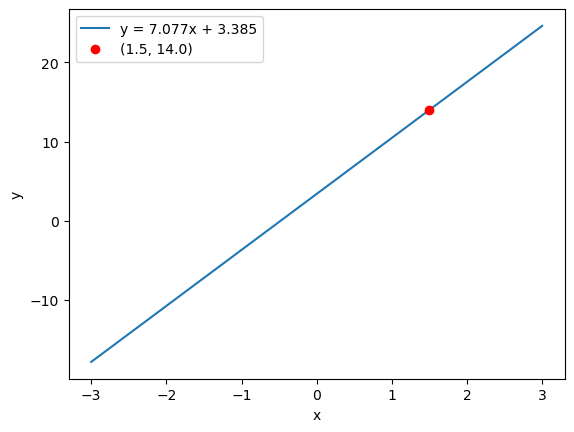

In [53]:
data = np.array([1.5, 14.0])  # x, y
w_optimized, b_optimized = optimize_parameters(data[0], data[1], 5.0, 2.0)
xs = np.linspace(-3, 3, 1000)
ys = []
for x_ in xs:
    ys.append(forward(x_, w_optimized, b_optimized))
plt.plot(
    xs,
    ys,
    label=f"y = {round(w_optimized, 3)}x + {round(b_optimized, 3)}",
)
plt.plot(data[0], data[1], "ro", label=f"({data[0]}, {data[1]})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Hopefully, you should see a rapid decrease of the error in the first few iterations, and the resulting error should be close to zero after 10 iterations.

How would a different step size affect the optimization? Why?

**Your answer:** A larger step size can make the error decrease more rapidly, but it also increases the risk of overshooting the minimum. As a result, within a fixed number of iterations, the error might not decrease as much as it would with a smaller step size. On the other hand, if the step size is too small, the error reduction would be slow, and the minimum might not be reached within the fixed number of iterations.

The process we have just implemented is called gradient descent. It is a simple optimization algorithm that is used to minimize a function by iteratively moving in the direction of steepest descent.
In our case, the function we are trying to minimize is the error between our line and the point, and the parameters we are optimizing are w and b.
The way we propagate the derivative of the error throughout the function to update the parameters is called backpropagation. It is a key concept in neural networks and deep learning, but is as simple as the chain rule in calculus at its core.
In deep learning, we usually refer to the error function as the loss function, and the derivatives that we have propagated from our loss function to our parameters are referred to as gradients.

### 2.3 Activation functions
The function we have used so far is not very exciting, and only lets us describe the rather boring family of linear functions. As you have already seen in the video and lecture material, we add an activation function to our otherwise linear neuron to be able to also model non-linear functions.

In the coming part of the lab we will use the notation that you might find familiar from the lectures, where $z = w*x + b$ denotes the output before activation, and $a = g(z)$ denotes the output after activation.

Lets start with implementing some common activation functions. To make them slightly more useful, we ask you to implement them such that they can handle vectorized input.

Due to the change of notation, we can make the following alias to simplify things:

In [54]:
de_dz = de_dy
dz_dw = dy_dw
dz_db = dy_db

#### 2.3.1 ReLU
The neural network will use the ReLU activation function in every layer except for the last. ReLU does element-wise comparison of the input matrix. For example, if the input is `X`, and `X[i,j] == 2` and `X[k,l] == -1`, then after applying ReLU, `X[i,j] == 2` and `X[k,l] == 0` should be true.  

The formula for implementing ReLU for a single neuron $i$ is:
\begin{equation}
relu(z_i) = 
    \begin{cases}
      0, & \text{if}\ z_i \leq 0 \\
      z_i, & \text{otherwise}
    \end{cases}
\end{equation}

Implement `relu` such that it supports both scalar and array input

In [55]:
def relu(z):
    """Implement the ReLU activation function.

    Arguments:
    z - the input of the activation function. Has a type of 'float' or 'numpy.ndarray'

    Returns:
    a - the output of the activation function. Has the same type and shape as 'z'
    """

    a = None
    a = np.maximum(0, z)
    return a

In [56]:
# test case
iha1_tests.test_relu_forward(relu)

Test passed


Can you name some of the advantages of the ReLU activation function? (We will not grade this answer in detail.)

**Your answer:** Smiplistic. Easy to compute gradient.


#### 2.3.2 Sigmoid
The sigmoid activation function is common for binary classification. This is because it squashes its input to the range [0,1].  
Implement the activation function `sigmoid` using the formula:  
\begin{equation}
    \sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}

Your implementation of `sigmoid` should support both scalar and array input.

In [57]:
def sigmoid(z):
    """Implement the sigmoid activation function

    Arguments:
    z - the input of the activation function. Has a type of 'float' or 'numpy.ndarray'

    Returns:
    a - the output of the activation function. Has the same type and shape as 'z'
    """
    a = None  
    a = 1/(1 + np.exp(-z))

    return a

In [58]:
# test case
iha1_tests.test_sigmoid(sigmoid)

Test passed


Why is the sigmoid activation function useful for binary classification? Feel free to use some numerical examples to show how the magnitudes of the variable $z$ affect the output of the sigmoid layer. (We will not grade this answer in detail.)

**Your answer:** The sigmoid activation function is useful for binary classification because its output range is between 0 and 1, making it suitable for interpreting as a binary probability with threshold 0.5.

#### 2.3.3 Visualization
Make a plot using matplotlib to visualize the activation functions between the input interval [-3,3]. The plot should have the following properties
 * one plot should contain a visualization of both `ReLU` and `sigmoid`;
 * x-axis: range of values between [-3,3], **hint**: np.linspace;
 * y-axis: the value of the activation functions at a given input `x`;
 * a legend explaining which line represents which activation function.

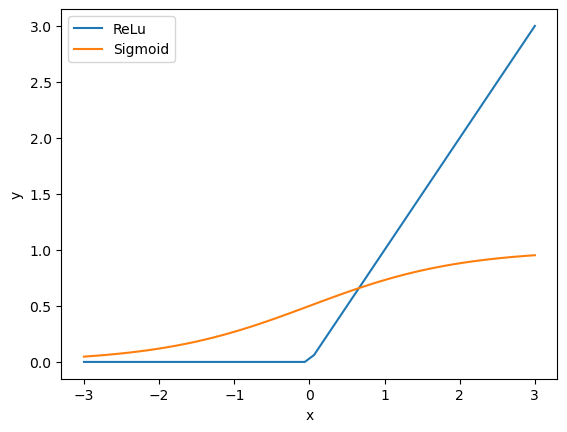

In [59]:
x = np.linspace(-3, 3)
y_relu = relu(x)
y_sigm = sigmoid(x)
plt.plot(x, y_relu, "-", label="ReLu")
plt.plot(x, y_sigm, "-", label="Sigmoid")


plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### 2.3.4 Softmax
Another common activation function is the softmax activation function. It is often used for the final layer of the neural network in classification tasks. Implement `softmax` according to the formula below. The subtraction of the maximum value is there solely to avoid overflows in a practical implementation.
\begin{equation}
softmax(z_i) = \frac{e^{z_i - max(\mathbf{z})}}{ \sum^j e^{z_j - max(\mathbf{z})}}
\end{equation}

In [60]:
def softmax(z):
    """Implement the softmax activation function

    Arguments:
    z - the input of the activation function, shape (BATCH_SIZE, FEATURES) and type 'numpy.ndarray'

    Returns:
    a - the output of the activation function, shape (BATCH_SIZE, FEATURES) and type 'numpy.ndarray'
    """

    a = None 
    z_stable = z-np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_stable)
    a = exp_z/np.sum(exp_z, axis=1, keepdims=True)

    return a

In [61]:
# test case
iha1_tests.test_softmax(softmax)

Test passed


What are the main differences between using `sigmoid` and `softmax` for multi-class classification problems? And when the number of classes is 2? (We will not grade this answer in detail.)

**Your answer:** Sigmoid is for binary classification providing a probability for one class and 
1−P for the other. It doesnt ensure probabilities add up to 1 so its not ideal for more than two classes. Softmax is used for multi-class classification giving probabilities for all classes that add up to 1, making sure the classes are exclusive. For binary classification, softmax is similar to sigmoid, two probabilities that sum to 1.

### 2.4 Putting the pieces together

Now you have implemented, and hopefully understood, the building blocks needed to build your first neural network. All that is left now is putting these pieces together.

#### 2.4.1 Implementing a layer

You will start with implementing a `Layer`-class. This will be convenient when later constructing your neural network. To keep things simple, and make use of the functions you've implemented earlier in this lab, we will stick to scalar input and having one neuron per layer. However, you will also add `ReLU` as an activation function this time.

Since you now need to also propagate your derivatives through the activation function, start with implementing the derivative of `ReLU`.

In [62]:
def relu_derivative(x):
    """Implement the derivative of the ReLU activation function

    Arguments:
    x - the input of the activation function. Has a type of 'float' or 'numpy.ndarray'
    Returns:
    dx - the derivative of the activation function. Has the same type and shape as 'x'.
    """
    dx = np.where(x > 0, 1, 0)
    return dx
    

In [63]:
assert relu_derivative(np.array(-1)) == 0
assert relu_derivative(np.array(1)) == 1

Now it's time to fill in the missing pieces of the `Layer`-class. The parameters of the layer should be initialized with random values. Think about how to initialize your parameters in a way that make sense with the chosen activation function (ReLU in this case). Hint: Look at the local gradient of ReLU and think about what ranges of values this gradient will be active and how it will affect the backpropagation.

In [64]:
class Layer:
    """Implement a class for a neural network layer.

    The class should implement the forward and backward passes of the layer.
    """

    def __init__(self):
        """Implement the initialization of the layer parameters.

        Arguments:
        None

        Returns:
        None
        """

        # Parameters of the layer. Should be initialized randomly.
        self.w = None
        self.b = None


        
        self.w = np.random.rand(1) * 3
        self.b = np.random.rand(1) * 3
        # Activation function for the layer.
        self.activation = relu
        self.activation_derivative = relu_derivative

        # Attributes to store the input and output of a layer during forward pass, for use in the backward passes.
        self.last_x = None
        self.last_a = None

    def forward(self, x):
        """Implement the forward pass of the layer.

        Arguments:
        x - the input to the layer, scalar of type 'float'

        Returns:
        a - the output of the layer, scalar of type 'float'
        """
        a = None
        z = self.w * x + self.b
        a = self.activation(z)
        self.last_x = x
        self.last_a = a
        return a

    def backward(self, de_da, step_size=0.01):
        """Implement the backward pass of the layer. The backward pass should update the parameters of
        the layer and return the derivative of the error with respect to the input of the layer.

        Arguments:
        de_da - the derivative of the error with respect to the output of the layer, scalar of type 'float'
        step_size - the step size for the update step, scalar of type 'float'

        Returns:
        de_dx - the derivative of the error with respect to the input of the layer, scalar of type 'float'
        """
        de_dx = de_da * self.activation_derivative(self.w * self.last_x) * self.w
        de_dw = de_da * self.last_x
        de_db = de_da
        self.w = self.w - de_dw * step_size
        self.b = self.b - de_db * step_size
    
        return de_dx

In [65]:
test_layer = Layer()

# make sure w and b are initialized
assert test_layer.w is not None
assert test_layer.b is not None

# set to some values for tests
test_layer.w = np.array(10.0)
test_layer.b = np.array(-1.0)

# assert correct forward for some input
assert test_layer.forward(np.array(42.0)) == 419.0
assert test_layer.last_x == 42.0
assert test_layer.last_a == 419.0

# assert correct backward
assert test_layer.backward(np.array(42.0), step_size=0.01) == 420
assert np.abs(test_layer.w - (-7.64)) < 0.01
assert np.abs(test_layer.b - (-1.42)) < 0.01

#### 2.4.2 Building your network
Almost there! Now we just need to chain a bunch of layers together and we have ourselves a neural network.

In [74]:
class NeuralNetwork:
    """Implement a class for a neural network.

    The class should implement the forward and backward passes of the neural network.
    """

    def __init__(self):
        self.layers = []

    def add_layer(self, layer):
        self.layers.append(layer)

    def forward(self, x):
        """Implement the forward pass of the neural network. The neural network should pass the input through all layers.
        
        Arguments:
        x - the input to the neural network, scalar of type 'float'

        Returns:
        x - the output of the neural network, scalar of type 'float'
        """
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, error_derivative, step_size=0.01):
        """Implement the backward pass of the neural network. The neural network should pass the error derivative through
        all layers and update the parameters of each layer.

        Arguments:
        error_derivative - the derivative of the error with respect to the output of the neural network, scalar of type 'float'
        """
        next_layer_derivative = error_derivative
        for layer in reversed(self.layers):
            next_layer_derivative = layer.backward(next_layer_derivative, step_size)
        

Lets test the forward pass of your network.

The error for the original parameters:  [64.51936277]


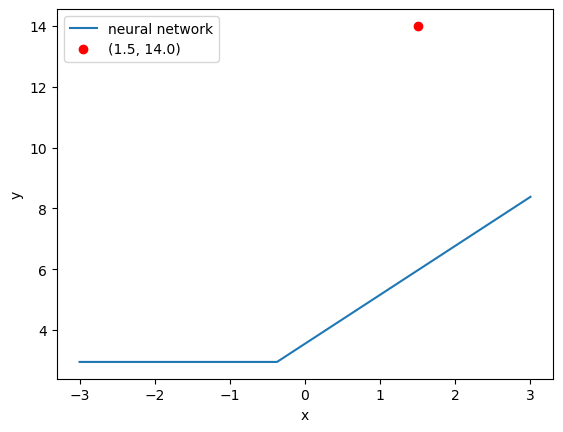

In [75]:
neural_network = NeuralNetwork()
layer1 = Layer()
layer2 = Layer()
neural_network.add_layer(layer1)
neural_network.add_layer(layer2)

data = np.array([1.5, 14.0])  # x, y
x, y_true = data
y_pred = neural_network.forward(x)
print("The error for the original parameters: ", error_function(y_pred, y_true))
xs = np.linspace(-3, 3, 1000)
ys = []
for x_ in xs:
    ys.append(neural_network.forward(x_))
plt.plot(xs, ys, label=f"neural network")
plt.plot(data[0], data[1], "ro", label=f"({data[0]}, {data[1]})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### 2.4.3 Training your network
Now let's also implement the iterative optimization that we did before. Here `y_pred` refers to the output from the last layer of your network, commonly referred to as the prediction.

In deep learning, we usually refer to the optimization process as "training" the network. Thus, the function to iteratively update the parameters of your network is here called `train`, but the principle remains the same as before. 

In [76]:
def train(x, y_true, neural_network, iterations=10, step_size=0.01):
    """Implement the training loop for the neural network. The training loop should update the parameters of the neural network
    based on the error between the predicted and true values.

    Arguments:
    x - the input to the neural network, scalar of type 'float'
    y_true - the true value of the output, scalar of type 'float'
    neural_network - the neural network object
    iterations - the number of training iterations, scalar of type 'int'
    step_size - the step size for the update step, scalar of type 'float'
    """

    for i in range(iterations):
        y_pred = neural_network.forward(x)
        de_dx = de_dy(y_pred, y_true)
        neural_network.backward(de_dx, step_size)
        print(f"Iteration {i} | Error: ", error_function(y_pred, y_true))

Finally, we can test the training loop on the same simple example as we did before.

Iteration 0 | Error:  [64.51936277]
Iteration 1 | Error:  [15.22316527]
Iteration 2 | Error:  [1.53090858]
Iteration 3 | Error:  [0.05129641]
Iteration 4 | Error:  [0.00089662]
Iteration 5 | Error:  [1.34353159e-05]
Iteration 6 | Error:  [1.97042205e-07]
Iteration 7 | Error:  [2.88217662e-09]
Iteration 8 | Error:  [4.21446573e-11]
Iteration 9 | Error:  [6.1623676e-13]


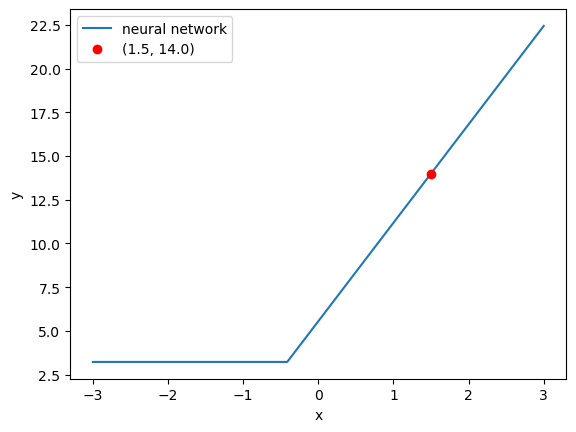

In [77]:
data = np.array([1.5, 14.0])  # x, y
train(data[0], data[1], neural_network)

xs = np.linspace(-3, 3, 1000)
ys = []
for x_ in xs:
    ys.append(neural_network.forward(x_))
plt.plot(xs, ys, label=f"neural network")
plt.plot(data[0], data[1], "ro", label=f"({data[0]}, {data[1]})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Hopefully, you should again see the error decrease at each iteration of our training loop. In the end, the error should be close to zero. 

## 3 Building a deep neural network

Very few problems are one-dimensional and cannot be solved with the simple scalar network we have implemented so far. 
Thus, as the final part of this assignment, you will now implement the `Layer` and `NeuralNetwork` classes such that they support multi-dimensional input, and any choice of activation function.
However, you will be given code for the backward propagation and only need to implement the forward propagation.

(If you want to try to derive the backward propagation yourself [this document](https://compsci697l.github.io/docs/vecDerivs.pdf) could be helpful to simplify the derivatives for higher dimensions)

Recall the formula for forward propagation of an arbitrary layer $l$:

\begin{equation}
\mathbf{a}^{[l]} = g(\mathbf{z}^{[l]}) = g(\mathbf{a}^{[l-1]}\mathbf{w}^{[l]} +\mathbf{b}^{[l]})
\end{equation}

where $g$ is the activation function given by `activation_fn`, which can be relu, sigmoid or softmax.


### 3.1 Initialize weights
You will first implement a helper function that takes the shape of a layer as input, and returns an initialized weight matrix $\mathbf{W}$ and bias vector $\mathbf{b}$ as output. The matrix $\mathbf{W}$ should be sampled from a normal distribution with mean 0 and standard deviation 2, and $\mathbf{b}$ should be initialized to all zeros.

In [78]:
def initialize_weights(layer_shape):
    """Implement initialization of the weight matrix and biases

    Arguments:
    layer_shape - a tuple of length 2, type (int, int), that determines the dimensions of the weight matrix: (input_dim, output_dim)

    Returns:
    w - a weight matrix with dimensions of 'layer_shape', (input_dim, output_dim), that is normally distributed with
        properties mu = 0, stddev = 2. Has a type of 'numpy.ndarray'
    b - a vector of initialized biases with shape (1,output_dim), all of value zero. Has a type of 'numpy.ndarray'
    """
    w = None  
    b = None  
    w = np.random.randn(layer_shape[0], layer_shape[1])*2
    b = np.zeros((1,layer_shape[1]))

    return w, b

In [79]:
# test case
iha1_tests.test_initialize_weights(initialize_weights)

Test passed


### 3.2 Implementing the layer

In [80]:
class Layer:
    """
    TODO: Build a class called Layer that satisfies the descriptions of the methods
    Make sure to utilize the helper functions you implemented before
    """

    def __init__(self, input_dim, output_dim, activation_fn=relu):
        """
        Arguments:
        input_dim - the number of inputs of the layer. type int
        output_dim - the number of outputs of the layer. type int
        activation_fn - a reference to the activation function to use. Should be 'relu' as a default
                        possible values are the 'relu', 'sigmoid' and 'softmax' functions you implemented earlier.
                        Has the type 'function'

        Attributes:
        w - the weight matrix of the layer, should be initialized with 'initialize_weights'
            and has the shape (INPUT_FEATURES, OUTPUT_FEATURES) and type 'numpy.ndarray'
        b - the bias vector of the layer, should be initialized with 'initialize_weights'
            and has the shape (1, OUTPUT_FEATURES) and type 'numpy.ndarray'
        activation_fn - a reference to the activation function to use.
                        Has the type 'function'
        """
        self.w, self.b = None, None  
        self.activation_fn = None  
        self.w, self.b = initialize_weights([input_dim, output_dim])
        self.activation_fn = activation_fn
        self.input = None
        self.output = None

    def forward_prop(self, a_prev):
        """Implement the forward propagation module of the neural network layer
        Should use whatever activation function that 'activation_fn' references to

        Arguments:
        a_prev - the input to the layer, which may be the data 'X', or the output from the previous layer.
            a_prev has the shape of (BATCH_SIZE, INPUT_FEATURES) and the type 'numpy.ndarray'

        Returns:
        a - the output of the layer when performing forward propagation. Has the type 'numpy.ndarray'
        """

        a = None  
        a = a_prev @ self.w + self.b
        a = self.activation_fn(a)
        self.input = a_prev
        self.output = a
        return a

    def backward_prop(self, output_gradient, learning_rate):
        if self.activation_fn == relu:
            output_gradient *= relu_derivative(self.output)
        weights_gradient = np.dot(self.input.T, output_gradient)
        input_gradient = np.dot(output_gradient, self.w.T)
        self.w -= learning_rate * weights_gradient
        self.b -= learning_rate * np.sum(output_gradient, axis=0, keepdims=True)
        return input_gradient

In [81]:
# test case, be sure that you pass the previous activation function tests before running this test
iha1_tests.test_layer(Layer, relu, sigmoid, softmax)

Test passed


### 3.3 Implementing the neural network
You will now define the actual neural network class. It is an L-layer neural network, meaning that the number of layers and neurons in each layer is specified as input by the user. Once again, you will only focus on implementing the forward propagation part.

Read the descriptions in the comments and complete the **TODO**s.

In [82]:
class NeuralNetwork:
    """
    TODO: Implement an L-layer neural network class by utilizing the Layer module defined above
    Each layer should use 'relu' activation function, except for the output layer, which should use 'softmax'
    """

    def __init__(self, input_n, layer_dims):
        """
        Arguments:
        input_n    - the number of inputs to the network. Should be the same as the length of a data sample
                     Has type int
        layer_dims - a python list or tuple of the number of neurons in each layer. Layer 'l' should have a weight matrix
                     with the shape ('layer_dims[l-1]', 'layer_dims[l]').
                     'layer_dims[-1]' is the dimension of the output layer.
                     Layer 1 should have the dimensions ('input_n', 'layer_dims[0]').
                     len(layer_dims) is the depth of the neural network
        Attributes:
        input_n - the number of inputs to the network. Has type int
        layers  - a python list of each layer in the network. Each layer should use the 'relu' activation function,
                  except for the last layer, which should use 'softmax'.
                  Has type 'list' containing layers of type 'Layer'
        """

        self.input_n = input_n  # TODO
        self.layers = []  # TODO
        previous_layer_dims = self.input_n
        for layer in layer_dims:
            self.layers.append(Layer(previous_layer_dims, layer))
            previous_layer_dims = layer
            
        self.layers[-1].activation_fn = softmax

    def forward_prop(self, x):
        """
        Implement the forward propagation procedure through the entire network, from input to output.
        You will now connect each layer's forward propagation function into a chain of layer-wise forward propagations.

        Arguments:
        x - the input data, which has the shape (BATCH_SIZE, NUM_FEATURES) and type 'numpy.ndarray'

        Returns:
        a - the output of the last layer after forward propagating through the every layer in 'layers'.
            Should have the dimension (BATCH_SIZE, layers[-1].w.shape[1]) and type 'numpy.ndarray'
        """
        a = x
        for layer in self.layers:
            a = layer.forward_prop(a) 
        return a

    def backward_prop(self, output_gradient, learning_rate):
        for layer in reversed(self.layers):
            output_gradient = layer.backward_prop(output_gradient, learning_rate)

In [83]:
# test case
iha1_tests.test_neuralnetwork(NeuralNetwork)

Test passed


### 3.4 Training

All that is left now is the training loop for your network. You are already given a loss function and its derivative (loss is just another word for error) that will be suitable for the upcoming problem that you will train your network on. Implement the missing steps in the training loop.

In [84]:
def compute_loss(output, y_true, epsilon=1e-10):
    p = np.clip(output, epsilon, 1 - epsilon)
    log_likelihood = -np.sum(y_true * np.log(p)) / y_true.shape[0]
    return log_likelihood


def compute_loss_gradient(output, y_true):
    return (output - y_true) / y_true.shape[0]


def train(neural_network, x_train, y_train, iterations, learning_rate):
    """Implement the training loop for the neural network. The training loop should update the parameters of the neural network
    based on the error between the predicted and true values.

    Arguments:
    neural_network - the neural network object
    x_train - the input to the neural network, shape (BATCH_SIZE, INPUT_FEATURES) and type 'numpy.ndarray'
    y_train - the true value of the output, shape (BATCH_SIZE, OUTPUT_FEATURES) and type 'numpy.ndarray'
    iterations - the number of training iterations, scalar of type 'int'
    learning_rate - the step size for the update step, scalar of type 'float'

    Returns:
    None
    """
    for iteration in range(iterations):
        output = neural_network.forward_prop(x_train)
        loss = compute_loss(output, y_train)
        output_gradient = compute_loss_gradient(output, y_train)
        neural_network.backward_prop(output_gradient, learning_rate)
        
        print(f"Iteration {iteration + 1}/{iterations} | Loss: {loss}")

You will now apply your newly created `NeuralNetwork`-class on a slightly more difficult problem than before. Given images of hand-drawn numbers, your network will be tasked with predicting the correct digit. For this we will use the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Below, we have prepared the necessary code needed to load and visualize the data. Run the cells below to see the size of the dataset splits and a visualization of some samples from the dataset. 

In [85]:
# Load MNIST data from sklearn
mnist = fetch_openml("mnist_784", version=1)
x, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

# Normalize the data
x = x / 255.0
y = y.astype(int)

# One-hot encode the labels
y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

# Split into training and test sets
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y_one_hot[:60000], y_one_hot[60000:]

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 784)
y_train shape: (60000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)


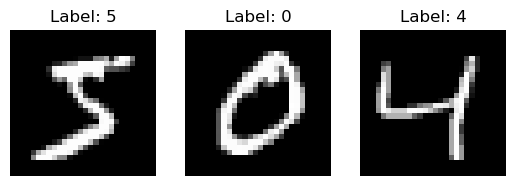

In [86]:
# Display the mnist data and labels for 3 samples
fig, axs = plt.subplots(1, 3)
for i in range(3):
    axs[i].imshow(x_train[i].reshape(28, 28), cmap="gray")
    axs[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axs[i].axis("off")
plt.show()

Before training the network, we want some way of running predictions on test data and calculate some metric that tells us how our network performed. In this case, we want to calculate the accuracy of our network, meaning the ratio of correctly predicted samples out of the full test set. Implement the function `predict_and_correct`which takes in a `NeuralNetwork`-object and some test data, makes predictions using the neural network, and finally outputs the accuracy of the predictions.

In [87]:
def predict_and_correct(model, x_test, y_test):
    """Implement a function that predicts the labels of the test data and calculates the accuracy of the predictions.

    Arguments:
    model - the neural network to use for prediction. Has type `NeuralNetwork`

    Returns:
    accuracy - the accuracy of the predictions. Has type 'float'
    """

    predictions = model.forward_prop(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    
    accuracy = np.mean(predicted_classes == true_classes)
    return accuracy

Now you can first test the accuracy of your untrained network. 

In [88]:
nn = NeuralNetwork(784, [64, 10])
print("Accuracy without training: ", predict_and_correct(nn, x_test, y_test))

Accuracy without training:  0.1057


How did it perform? Was it in line with your expectations? Why/why not?

**Your answer:** Yes, in line with expectations. Not trained --> random guess out of 10 instances.

Let's train the network for some iterations and again evaluate the performance.

In [89]:
# Train the neural network
train(nn, x_train, y_train, iterations=50, learning_rate=0.1)

Iteration 1/50 | Loss: 20.453649443489468
Iteration 2/50 | Loss: 19.85020202748893
Iteration 3/50 | Loss: 18.70142943509826
Iteration 4/50 | Loss: 17.924666167233955
Iteration 5/50 | Loss: 17.10064811879387
Iteration 6/50 | Loss: 16.251499848689193
Iteration 7/50 | Loss: 15.278509189343742
Iteration 8/50 | Loss: 14.634969740208781
Iteration 9/50 | Loss: 13.928493541698318
Iteration 10/50 | Loss: 13.39252066543837
Iteration 11/50 | Loss: 12.851873208866756
Iteration 12/50 | Loss: 12.411929959470465
Iteration 13/50 | Loss: 11.99460002714979
Iteration 14/50 | Loss: 11.627202718586794
Iteration 15/50 | Loss: 11.28713189545929
Iteration 16/50 | Loss: 10.983154063408161
Iteration 17/50 | Loss: 10.692043931333487
Iteration 18/50 | Loss: 10.422613013669688
Iteration 19/50 | Loss: 10.178158028473776
Iteration 20/50 | Loss: 9.95196494126122
Iteration 21/50 | Loss: 9.7387983126565
Iteration 22/50 | Loss: 9.53840163661514
Iteration 23/50 | Loss: 9.348043071904492
Iteration 24/50 | Loss: 9.17104697

In [90]:
print("Accuracy after training: ", predict_and_correct(nn, x_test, y_test))

Accuracy after training:  0.6722


How did the network perform after training? Was it in line with your expectations? Why/why not?

**Your answer:** Yes, i think so. ~0.7 is a big improvement and not to bad for a small oridnary FFNN.

Below is some code to visualize your networks prediction for a chosen sample in the test set.

In [93]:
# Create a function that visualizes the data, prediction and true label for some sample index in the test set
def visualize_prediction(model, x_test, y_test, sample_idx):
    """Implement a function that visualizes the data, prediction and true label for a sample in the test set.

    Arguments:
    model - the neural network to use for prediction. Has type `NeuralNetwork`
    x_test - the input to the neural network, shape (BATCH_SIZE, INPUT_FEATURES) and type 'numpy.ndarray'
    y_test - the true value of the output, shape (BATCH_SIZE, OUTPUT_FEATURES) and type 'numpy.ndarray'
    sample_idx - the index of the sample to visualize. Has type 'int'

    Returns:
    None
    """
    assert (sample_idx >= 0) & (
        sample_idx < x_test.shape[0]
    ), "Sample index out of bounds"

    y_pred = model.forward_prop(x_test[sample_idx : sample_idx + 1])
    plt.imshow(x_test[sample_idx].reshape(28, 28), cmap="gray")
    plt.title(
        f"Prediction: {np.argmax(y_pred)} | True label: {np.argmax(y_test[sample_idx])}"
    )
    plt.axis("off")
    plt.show()

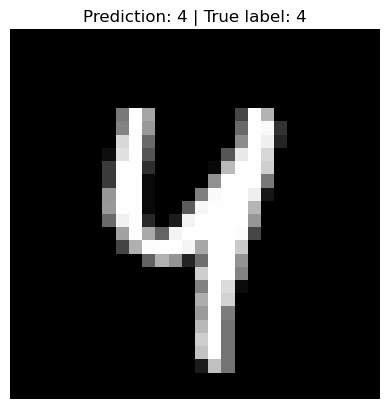

In [94]:
visualize_prediction(nn, x_test, y_test, 42)

## Congratulations!
You have successfully implemented a neural network from scratch using only NumPy!  